In [40]:
from requests import get
import requests
from bs4 import BeautifulSoup
import os
import json
from pprint import pprint
import re

import itertools as it
from typing import List, Dict
import pandas as pd
from env import path

import unicodedata
import nltk
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud


In [28]:
ADDITIONAL_STOPWORDS = ['r', 'u', '2', 'ltgt']

def clean(text):
    'A simple function to cleanup text data'
    wnl = nltk.stem.WordNetLemmatizer()
    stopwords = nltk.corpus.stopwords.words('english') + ADDITIONAL_STOPWORDS
    text = (unicodedata.normalize('NFKD', text)
             .encode('ascii', 'ignore')
             .decode('utf-8', 'ignore')
             .lower())
    words = re.sub(r'[^\w\s]', '', text).split()
    return [wnl.lemmatize(word) for word in words if word not in stopwords]



In [32]:
file = 'spam.csv'

In [33]:
df = pd.read_csv(path+file, encoding='ISO-8859-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [9]:
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [10]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [13]:
df[df['Unnamed: 2'].notnull()]

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
95,spam,Your free ringtone is waiting to be collected....,PO Box 5249,"MK17 92H. 450Ppw 16""",NaN
281,ham,\Wen u miss someone,the person is definitely special for u..... B...,why to miss them,"just Keep-in-touch\"" gdeve.."""
444,ham,\HEY HEY WERETHE MONKEESPEOPLE SAY WE MONKEYAR...,HOWU DOIN? FOUNDURSELF A JOBYET SAUSAGE?LOVE ...,NaN,NaN
671,spam,SMS. ac sun0819 posts HELLO:\You seem cool,"wanted to say hi. HI!!!\"" Stop? Send STOP to ...",NaN,NaN
710,ham,Height of Confidence: All the Aeronautics prof...,"this wont even start........ Datz confidence..""",NaN,NaN
899,spam,Your free ringtone is waiting to be collected....,PO Box 5249,"MK17 92H. 450Ppw 16""",NaN
1038,ham,"Edison has rightly said, \A fool can ask more ...",GN,GE,"GNT:-)"""
1127,ham,"Height of \Oh shit....!!\"" situation: A guy th...",".;-):-D""",NaN,NaN
1266,ham,\Hey sorry I didntgive ya a a bellearlier hunny,just been in bedbut mite go 2 thepub l8tr if u...,NaN,NaN
1384,ham,"Storming msg: Wen u lift d phne, u say \HELLO\...","bt not his girlfrnd... G o o d n i g h t . . .@""",NaN,NaN


#### Reduce dataframe down to two columns. Delete 3 extra columns that contain about 70 texts.


In [14]:
sms = df[['v1', 'v2']]

In [15]:
sms.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [20]:
sms.rename(columns = {'v1': 'label', 'v2': 'text'}, inplace=True)

/usr/local/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [22]:
sms.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [23]:
labels = pd.concat([sms.label.value_counts(),
                    sms.label.value_counts(normalize=True)], axis=1)
labels.columns = ['n', 'percent']
labels

,n,percent
ham,4825,0.865937
spam,747,0.134063


In [29]:
ham_words = clean(' '.join(sms[sms.label == 'ham'].text))
spam_words = clean(' '.join(sms[sms.label == 'spam'].text))
all_words = clean(' '.join(sms.text))

In [30]:
ham_freq = pd.Series(ham_words).value_counts()
spam_freq = pd.Series(spam_words).value_counts()
all_freq = pd.Series(all_words).value_counts()

spam_freq.head()

call    359
free    216
txt     150
ur      144
text    137
dtype: int64

In [31]:
word_counts = (pd.concat([all_freq, ham_freq, spam_freq], axis=1, sort=True)
                .set_axis(['all', 'ham', 'spam'], axis=1, inplace=False)
                .fillna(0)
                .apply(lambda s: s.astype(int)))

word_counts.head()

,all,ham,spam
0,3,0,3
008704050406,2,0,2
0089my,1,0,1
0121,1,0,1
01223585236,1,0,1


In [35]:
word_counts.sort_values(by='all', ascending=False).head(10)

,all,ham,spam
call,600,241,359
im,462,449,13
get,397,314,83
ur,384,240,144
go,304,273,31
4,287,168,119
dont,279,257,22
ok,277,272,5
free,275,59,216
know,267,241,26


Text(0.5, 1.0, 'Proportion of Spam vs Ham for the 20 most common words')

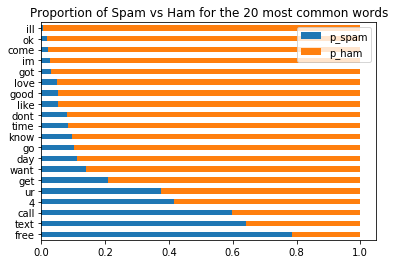

In [38]:
# figure out the percentage of spam vs ham
(word_counts
 .assign(p_spam=word_counts.spam / word_counts['all'],
         p_ham=word_counts.ham / word_counts['all'])
 .sort_values(by='all')
 [['p_spam', 'p_ham']]
 .tail(20)
 .sort_values('p_ham')
 .plot.barh(stacked=True))

plt.title('Proportion of Spam vs Ham for the 20 most common words')

#### 1. Spam Data
    * Load the spam data set.
    * Create and explore bigrams for the spam data. Visualize them with a word cloud. How do they compare with the ham bigrams?
    * Is there any overlap in the bigrams for the spam data and the ham data?
    * Create and explore with trigrams (i.e. a n-gram with an n of 3) for both the spam and ham data.

In [42]:
ham = sms[sms.label == 'ham']
spam = sms[sms.label == 'spam']

In [51]:
ham['text']

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
6       Even my brother is not like to speak with me. ...
7       As per your request 'Melle Melle (Oru Minnamin...
10      I'm gonna be home soon and i don't want to tal...
13      I've been searching for the right words to tha...
14                    I HAVE A DATE ON SUNDAY WITH WILL!!
16                             Oh k...i'm watching here:)
17      Eh u remember how 2 spell his name... Yes i di...
18      Fine if thatåÕs the way u feel. ThatåÕs the wa...
20              Is that seriously how you spell his name?
21      IÛ÷m going to try for 2 months ha ha only joking
22      So Ì_ pay first lar... Then when is da stock c...
23      Aft i finish my lunch then i go str down lor. ...
24      Ffffffffff. Alright no way I can meet up with ...
25      Just f

## Word clouds

(-0.5, 399.5, 199.5, -0.5)

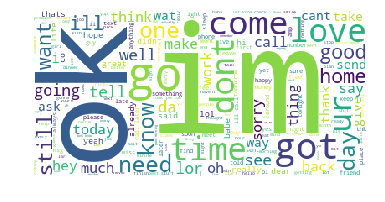

In [80]:
img = WordCloud(background_color='white').generate(' '.join(ham_words))
plt.imshow(img)
plt.axis('off')


/usr/local/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


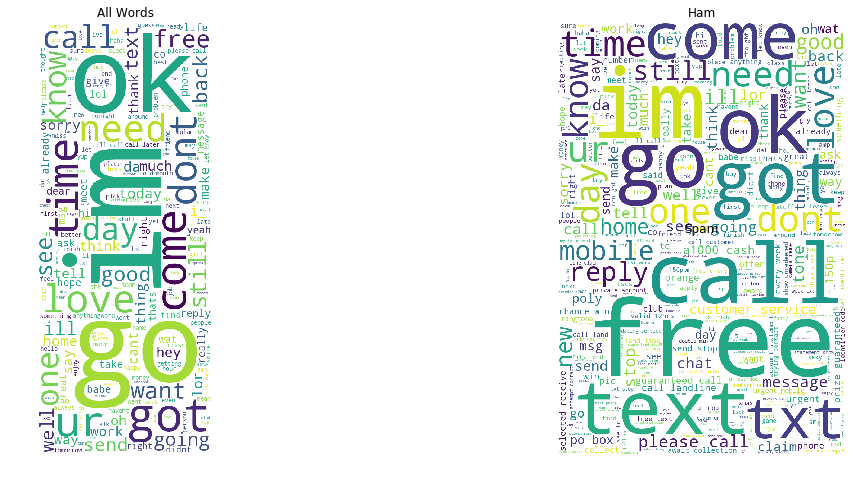

In [95]:
all_cloud = WordCloud(background_color='white', height=1000, width=400).generate(' '.join(all_words))
ham_cloud = WordCloud(background_color='white', height=600, width=800).generate(' '.join(ham_words))
spam_cloud = WordCloud(background_color='white', height=600, width=800).generate(' '.join(spam_words))



fig = plt.figure(figsize=(16, 6))
axs = [plt.axes([0, 0, .5, 1]), plt.axes([.5, .5, .5, .5]), plt.axes([.5, 0, .5, .5])]

axs[0].imshow(all_cloud)
axs[1].imshow(ham_cloud)
axs[2].imshow(spam_cloud)

axs[0].set_title('All Words')
axs[1].set_title('Ham')
axs[2].set_title('Spam')

fig.tight_layout(pad=200)


for ax in axs: ax.axis('off')

## Bigrams

In [96]:
sentence = 'Mary had a little lamb'

bigrams = nltk.ngrams(sentence.split(), 2)
list(bigrams)

[('Mary', 'had'), ('had', 'a'), ('a', 'little'), ('little', 'lamb')]

In [103]:
ham_bigrams = nltk.ngrams(' '.join(ham_words).split(), 2)
list(ham_bigrams)

[('go', 'jurong'),
 ('jurong', 'point'),
 ('point', 'crazy'),
 ('crazy', 'available'),
 ('available', 'bugis'),
 ('bugis', 'n'),
 ('n', 'great'),
 ('great', 'world'),
 ('world', 'la'),
 ('la', 'e'),
 ('e', 'buffet'),
 ('buffet', 'cine'),
 ('cine', 'got'),
 ('got', 'amore'),
 ('amore', 'wat'),
 ('wat', 'ok'),
 ('ok', 'lar'),
 ('lar', 'joking'),
 ('joking', 'wif'),
 ('wif', 'oni'),
 ('oni', 'dun'),
 ('dun', 'say'),
 ('say', 'early'),
 ('early', 'hor'),
 ('hor', 'c'),
 ('c', 'already'),
 ('already', 'say'),
 ('say', 'nah'),
 ('nah', 'dont'),
 ('dont', 'think'),
 ('think', 'go'),
 ('go', 'usf'),
 ('usf', 'life'),
 ('life', 'around'),
 ('around', 'though'),
 ('though', 'even'),
 ('even', 'brother'),
 ('brother', 'like'),
 ('like', 'speak'),
 ('speak', 'treat'),
 ('treat', 'like'),
 ('like', 'aid'),
 ('aid', 'patent'),
 ('patent', 'per'),
 ('per', 'request'),
 ('request', 'melle'),
 ('melle', 'melle'),
 ('melle', 'oru'),
 ('oru', 'minnaminunginte'),
 ('minnaminunginte', 'nurungu'),
 ('nurung

#### 2. Explore the blog articles using the techniques discussed in the exploration lesson.

#### 3. Explore the news articles using the techniques discussed in the exploration lesson. Use the category variable when exploring. 